# Preparation

In [1]:
!nvidia-smi
!nvcc --version

Sat Jan  4 01:58:26 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install pennylane numpy matplotlib qiskit datasets torch peft transformers accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 

In [3]:
!pip install qiskit[visualization]==1.1.0
# Use the following if you are on MacOS/zsh
#!pip install 'qiskit[visualization]'==1.1.0
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install prototype-zne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 101.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=baaff2e4a50dead76290936af1ba348953f9aea568c195d3d2fe01a4aacb76ab
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.3.1
    Uninstalling qiskit-1.3.1:
      Successfully uninstalled qiskit-1.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
Tesla T4


In [5]:
#!pip install PennyLane-Qiskit
!pip install git+https://github.com/kianaaa19/pennylane-qiskit # Forked & Modified

  Cloning https://github.com/kianaaa19/pennylane-qiskit to /tmp/pip-req-build-jm28dwwv
  Running command git clone --filter=blob:none --quiet https://github.com/kianaaa19/pennylane-qiskit /tmp/pip-req-build-jm28dwwv
  Resolved https://github.com/kianaaa19/pennylane-qiskit to commit ac9f1addea4eed97473567002286df10b8c6b533
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 4.2 MB/s eta 0:00:00
  Created wheel for PennyLane-qiskit: filename=PennyLane_qiskit-0.40.0.dev0-py3-none-any.whl size=44734 sha256=1252d89686d37d0bd9458ea2ed6bceb6c50e7ba95e53651bc0a683747fa5c905
  Stored in directory: /tmp/pip-ephem-wheel-cache-rncerh3m/wheels/b7/ad/72/66c593f2f4b97ee14e5c30752c2d8db1df3451a8a4a7964fad
Successfully built PennyLane-qiskit
  Attempting uninstall: sympy
    Found existing installation: 

In [6]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 95.6 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12.1
    Uninstalling sympy-1.12.1:
      Successfully uninstalled sympy-1.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pennylane-qiskit 0.40.0.dev0 requires sympy<1.13, but you have sympy 1.13.1 which is incompatible.


In [7]:
%set_env QXToken=he9m0m7m7xf

env: QXToken=he9m0m7m7xf


In [8]:
# Pennylane modules
import pennylane as qml
from pennylane import numpy as np

# Qiskit modules
from math import pi
from qiskit.circuit.library import QFT
from qiskit.providers.fake_provider import GenericBackendV2, generic_backend_v2
generic_backend_v2._NOISE_DEFAULTS["cx"] = (5.99988e-06, 6.99988e-06, 1e-5, 5e-3)
from qiskit.primitives import Estimator
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit import transpile, QuantumCircuit
from qiskit.circuit import Gate
from qiskit.converters import circuit_to_dag
from qiskit.transpiler import CouplingMap, StagedPassManager, PassManager, AnalysisPass, TransformationPass
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.preset_passmanagers.common import generate_unroll_3q, generate_embed_passmanager
from qiskit.quantum_info import hellinger_fidelity
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.dagcircuit import DAGCircuit
from qiskit_ibm_runtime.fake_provider import FakeTorino

# Transpiler Passes
## Layout passes
from qiskit.transpiler.passes.layout.csp_layout import CSPLayout
from qiskit.transpiler.passes.layout.dense_layout import DenseLayout
from qiskit.transpiler.passes.layout.sabre_layout import SabreLayout
from qiskit.transpiler.passes.layout.vf2_layout import VF2Layout
from qiskit.transpiler.passes.layout.trivial_layout import TrivialLayout

## Routing passes
from qiskit.transpiler.passes.routing.basic_swap import BasicSwap
from qiskit.transpiler.passes.routing.lookahead_swap import LookaheadSwap
from qiskit.transpiler.passes.routing.sabre_swap import SabreSwap
from qiskit.transpiler.passes.routing.stochastic_swap import StochasticSwap
from qiskit.transpiler.passes.routing.star_prerouting import StarPreRouting

## Synthesis passes (passes for the translation stage)
from qiskit.circuit import SessionEquivalenceLibrary
from qiskit.circuit.equivalence_library import SessionEquivalenceLibrary
from qiskit.transpiler.passes.basis.basis_translator import BasisTranslator
from qiskit.transpiler.passes.synthesis.high_level_synthesis import HighLevelSynthesis
### The next pass could also be considered an optimization pass.
from qiskit.transpiler.passes.synthesis.unitary_synthesis import UnitarySynthesis

## Optimization passes
from qiskit.transpiler.passes.optimization.collect_1q_runs import Collect1qRuns
from qiskit.transpiler.passes.optimization.collect_2q_blocks import Collect2qBlocks
from qiskit.transpiler.passes.optimization.consolidate_blocks import ConsolidateBlocks
from qiskit.transpiler.passes.optimization.commutative_cancellation import CommutativeCancellation

# Other
import time
import os
import copy
import logging
from argparse import ArgumentParser
import datetime

# Torch
import datasets
from datasets import load_dataset, DatasetDict
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset, Dataset, random_split
from transformers import (
    AdamW,
    GPT2Tokenizer,
    GPTNeoForSequenceClassification,
    GPTNeoForCausalLM,
    get_linear_schedule_with_warmup,
    AutoModelForCausalLM,
    AutoModelForSequenceClassification,
    glue_compute_metrics
)
from transformers.modeling_outputs import SequenceClassifierOutput, CausalLMOutputWithPast
import os
import time
import copy
from peft import LoraConfig, get_peft_model, TaskType, PeftModel
import kagglehub
import pandas as pd
import bitsandbytes as bnb
from transformers import BitsAndBytesConfig
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[
        logging.FileHandler("train_model.log", mode='w'),
        logging.StreamHandler()
    ]
)

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


#step = 2e-5                 # Learning rate
step = 1e-2                 # Learning rate
batch_size = 4              # Number of samples for each training step
num_epochs = 10              # Number of training epochs
rng_seed = 42               # Seed for random number generator
start_time = time.time()    # Start of the computation timer
n_qubits = 127 # Number of qubits
q_depth = 6 # Depth of the quantum circuit (number of variational layers)
q_delta = 0.01 # Initial spread of random quantum weights
num_labels = 768

torch.manual_seed(rng_seed)

# Data Processing

In [10]:
# Download the dataset
path = kagglehub.dataset_download("pashupatigupta/emotion-detection-from-text")

print("Path to dataset files:", path)

100%|██████████| 1.56M/1.56M [00:01<00:00, 1.52MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pashupatigupta/emotion-detection-from-text/versions/1


In [11]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/pashupatigupta/emotion-detection-from-text/versions/1/tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [12]:
df = df.drop(columns=["tweet_id"])

In [13]:
df = df[["content", "sentiment"]]

In [14]:
df = df.head(20)
print(df)

                                              content   sentiment
0   @tiffanylue i know  i was listenin to bad habi...       empty
1   Layin n bed with a headache  ughhhh...waitin o...     sadness
2                 Funeral ceremony...gloomy friday...     sadness
3                wants to hang out with friends SOON!  enthusiasm
4   @dannycastillo We want to trade with someone w...     neutral
5   Re-pinging @ghostridah14: why didn't you go to...       worry
6   I should be sleep, but im not! thinking about ...     sadness
7                Hmmm. http://www.djhero.com/ is down       worry
8             @charviray Charlene my love. I miss you     sadness
9          @kelcouch I'm sorry  at least it's Friday?     sadness
10                                   cant fall asleep     neutral
11                            Choked on her retainers       worry
12  Ugh! I have to beat this stupid song to get to...     sadness
13  @BrodyJenner if u watch the hills in london u ...     sadness
14        

In [15]:
# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-125M")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token as EOS token
model = GPTNeoForSequenceClassification.from_pretrained("EleutherAI/gpt-neo-125M", num_labels=7)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

Some weights of GPTNeoForSequenceClassification were not initialized from the model checkpoint at EleutherAI/gpt-neo-125M and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
model.config.pad_token_id = tokenizer.pad_token_id

In [17]:
# Tokenization and padding
tokenized_data = tokenizer(
    list(df["content"]),  # Input text
    max_length=128,       # Maximum sequence length
    padding="max_length", # Pad sequences to max_length
    truncation=True,      # Truncate sequences longer than max_length
    return_tensors="pt"   # Return PyTorch tensors
)

In [18]:
# Extract tokenized components
input_ids = tokenized_data["input_ids"]
attention_mask = tokenized_data["attention_mask"]

In [19]:
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = torch.tensor(label_encoder.fit_transform(df["sentiment"]))

In [20]:
label_names = label_encoder.classes_.tolist()

In [21]:
print(label_names)

['empty', 'enthusiasm', 'love', 'neutral', 'sadness', 'surprise', 'worry']


In [22]:
# Define custom dataset class
class TextDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": self.input_ids[idx],
            "attention_mask": self.attention_mask[idx],
            "labels": self.labels[idx]
        }

In [23]:
# Create Dataset
dataset = TextDataset(input_ids, attention_mask, encoded_labels)

In [24]:
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [25]:
# Train/Infer with Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [26]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

In [27]:
model.eval()

GPTNeoForSequenceClassification(
  (transformer): GPTNeoModel(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(2048, 768)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPTNeoBlock(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPTNeoAttention(
          (attention): GPTNeoSelfAttention(
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=False)
            (q_proj): Linear(in_features=768, out_features=768, bias=False)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTNeoMLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (c_proj)

Epoch 1
Epoch 1/10
Train Loss: 2.5649 | Train Acc: 0.1000 | Train MAE: 1.9500
Val Loss: 1.1668 | Val Acc: 0.6000 | Val MAE: 0.8500
--------------------------------------------------


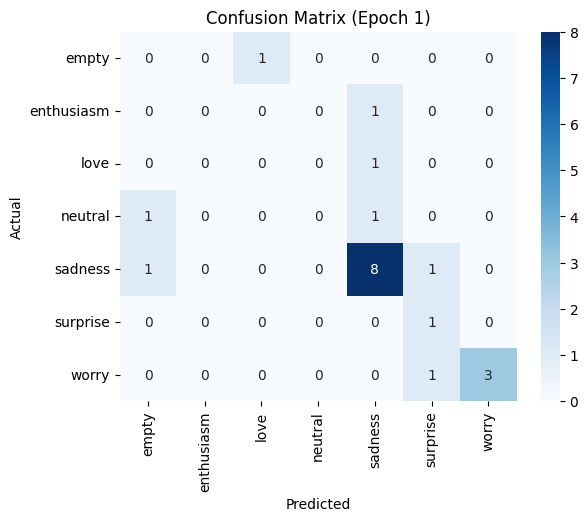

Classification Report:
              precision    recall  f1-score   support

       empty       0.00      0.00      0.00         1
  enthusiasm       0.00      0.00      0.00         1
        love       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         2
     sadness       0.73      0.80      0.76        10
    surprise       0.33      1.00      0.50         1
       worry       1.00      0.75      0.86         4

    accuracy                           0.60        20
   macro avg       0.29      0.36      0.30        20
weighted avg       0.58      0.60      0.58        20

Epoch 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/10
Train Loss: 0.8933 | Train Acc: 0.7000 | Train MAE: 0.7000
Val Loss: 0.4877 | Val Acc: 0.8500 | Val MAE: 0.3000
--------------------------------------------------


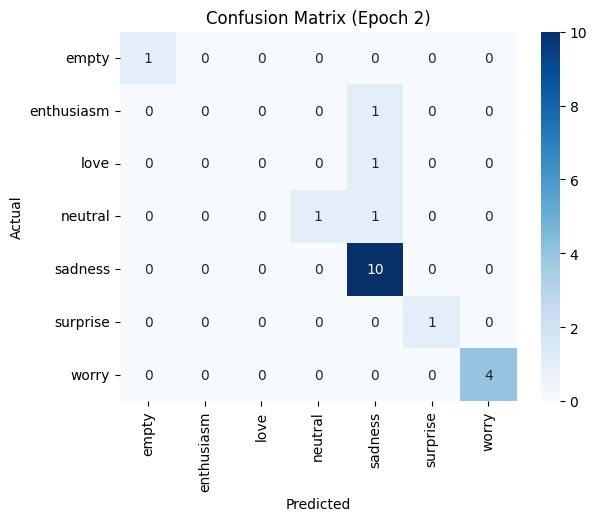

Classification Report:
              precision    recall  f1-score   support

       empty       1.00      1.00      1.00         1
  enthusiasm       0.00      0.00      0.00         1
        love       0.00      0.00      0.00         1
     neutral       1.00      0.50      0.67         2
     sadness       0.77      1.00      0.87        10
    surprise       1.00      1.00      1.00         1
       worry       1.00      1.00      1.00         4

    accuracy                           0.85        20
   macro avg       0.68      0.64      0.65        20
weighted avg       0.78      0.85      0.80        20

Epoch 3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3/10
Train Loss: 0.4634 | Train Acc: 0.9000 | Train MAE: 0.2000
Val Loss: 0.1910 | Val Acc: 0.9500 | Val MAE: 0.0500
--------------------------------------------------


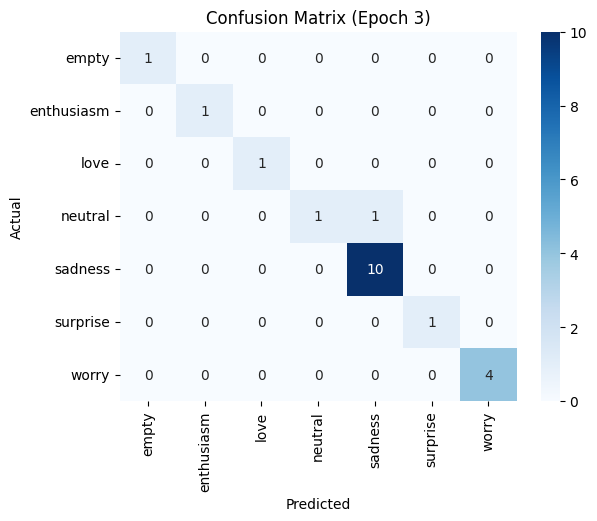

Classification Report:
              precision    recall  f1-score   support

       empty       1.00      1.00      1.00         1
  enthusiasm       1.00      1.00      1.00         1
        love       1.00      1.00      1.00         1
     neutral       1.00      0.50      0.67         2
     sadness       0.91      1.00      0.95        10
    surprise       1.00      1.00      1.00         1
       worry       1.00      1.00      1.00         4

    accuracy                           0.95        20
   macro avg       0.99      0.93      0.95        20
weighted avg       0.95      0.95      0.94        20

Epoch 4
Epoch 4/10
Train Loss: 0.1604 | Train Acc: 1.0000 | Train MAE: 0.0000
Val Loss: 0.0525 | Val Acc: 1.0000 | Val MAE: 0.0000
--------------------------------------------------


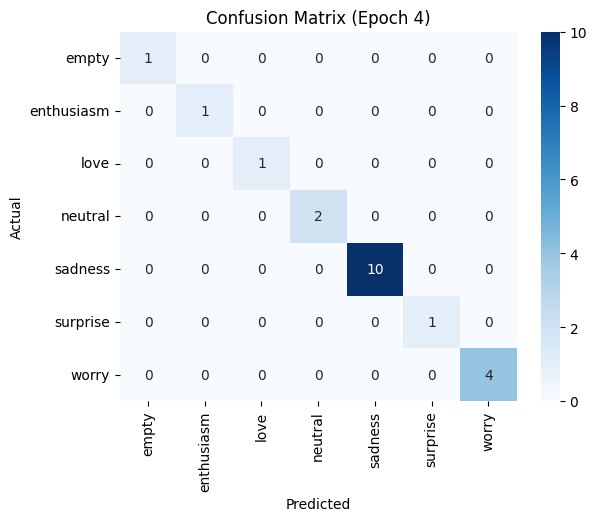

Classification Report:
              precision    recall  f1-score   support

       empty       1.00      1.00      1.00         1
  enthusiasm       1.00      1.00      1.00         1
        love       1.00      1.00      1.00         1
     neutral       1.00      1.00      1.00         2
     sadness       1.00      1.00      1.00        10
    surprise       1.00      1.00      1.00         1
       worry       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Epoch 5
Epoch 5/10
Train Loss: 0.0357 | Train Acc: 1.0000 | Train MAE: 0.0000
Val Loss: 0.0101 | Val Acc: 1.0000 | Val MAE: 0.0000
--------------------------------------------------


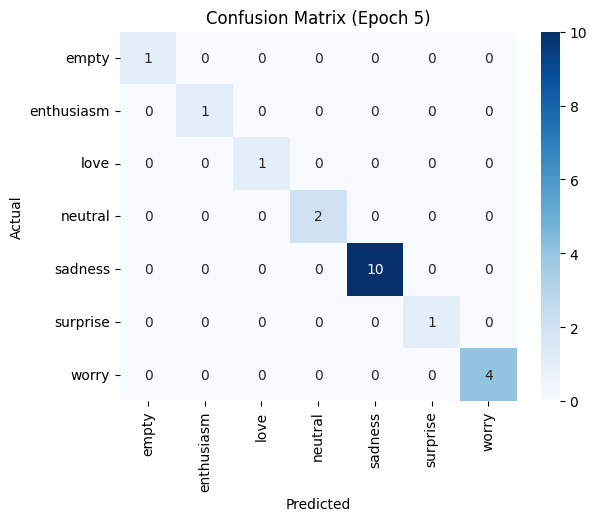

Classification Report:
              precision    recall  f1-score   support

       empty       1.00      1.00      1.00         1
  enthusiasm       1.00      1.00      1.00         1
        love       1.00      1.00      1.00         1
     neutral       1.00      1.00      1.00         2
     sadness       1.00      1.00      1.00        10
    surprise       1.00      1.00      1.00         1
       worry       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Epoch 6
Epoch 6/10
Train Loss: 0.0078 | Train Acc: 1.0000 | Train MAE: 0.0000
Val Loss: 0.0021 | Val Acc: 1.0000 | Val MAE: 0.0000
--------------------------------------------------


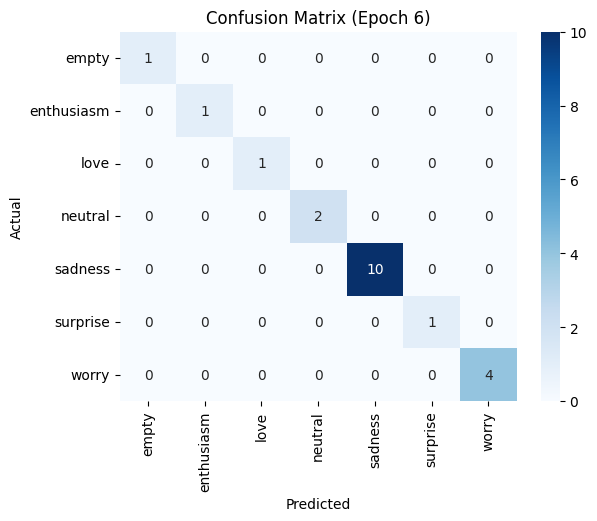

Classification Report:
              precision    recall  f1-score   support

       empty       1.00      1.00      1.00         1
  enthusiasm       1.00      1.00      1.00         1
        love       1.00      1.00      1.00         1
     neutral       1.00      1.00      1.00         2
     sadness       1.00      1.00      1.00        10
    surprise       1.00      1.00      1.00         1
       worry       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Epoch 7
Epoch 7/10
Train Loss: 0.0015 | Train Acc: 1.0000 | Train MAE: 0.0000
Val Loss: 0.0006 | Val Acc: 1.0000 | Val MAE: 0.0000
--------------------------------------------------


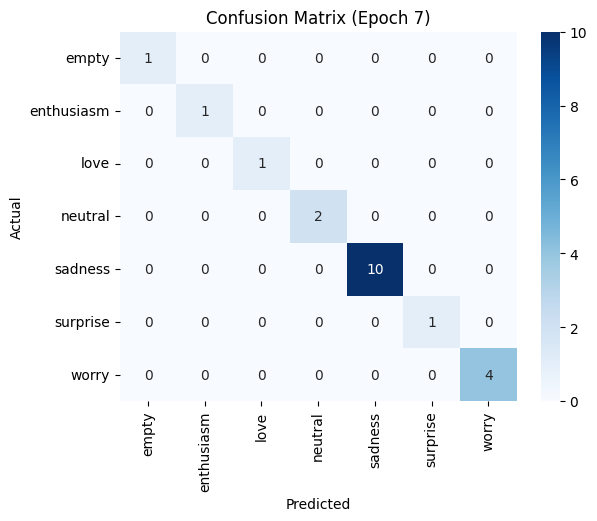

Classification Report:
              precision    recall  f1-score   support

       empty       1.00      1.00      1.00         1
  enthusiasm       1.00      1.00      1.00         1
        love       1.00      1.00      1.00         1
     neutral       1.00      1.00      1.00         2
     sadness       1.00      1.00      1.00        10
    surprise       1.00      1.00      1.00         1
       worry       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Epoch 8
Epoch 8/10
Train Loss: 0.0006 | Train Acc: 1.0000 | Train MAE: 0.0000
Val Loss: 0.0003 | Val Acc: 1.0000 | Val MAE: 0.0000
--------------------------------------------------


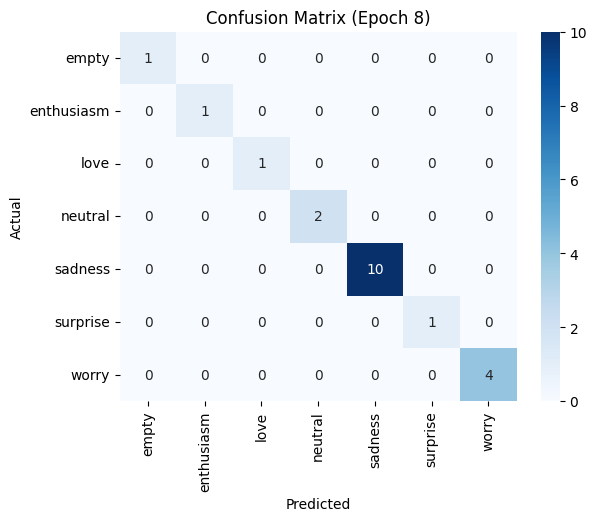

Classification Report:
              precision    recall  f1-score   support

       empty       1.00      1.00      1.00         1
  enthusiasm       1.00      1.00      1.00         1
        love       1.00      1.00      1.00         1
     neutral       1.00      1.00      1.00         2
     sadness       1.00      1.00      1.00        10
    surprise       1.00      1.00      1.00         1
       worry       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Epoch 9
Epoch 9/10
Train Loss: 0.0003 | Train Acc: 1.0000 | Train MAE: 0.0000
Val Loss: 0.0002 | Val Acc: 1.0000 | Val MAE: 0.0000
--------------------------------------------------


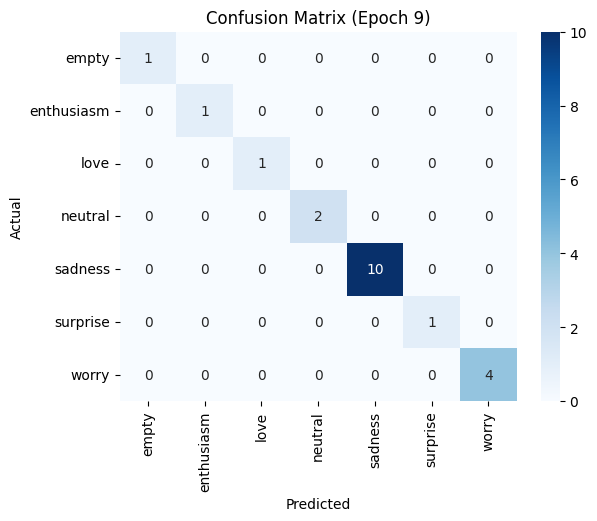

Classification Report:
              precision    recall  f1-score   support

       empty       1.00      1.00      1.00         1
  enthusiasm       1.00      1.00      1.00         1
        love       1.00      1.00      1.00         1
     neutral       1.00      1.00      1.00         2
     sadness       1.00      1.00      1.00        10
    surprise       1.00      1.00      1.00         1
       worry       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Epoch 10
Epoch 10/10
Train Loss: 0.0002 | Train Acc: 1.0000 | Train MAE: 0.0000
Val Loss: 0.0001 | Val Acc: 1.0000 | Val MAE: 0.0000
--------------------------------------------------


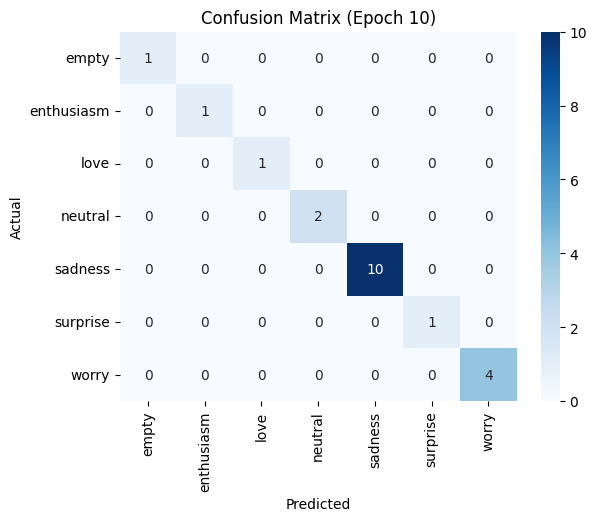

Classification Report:
              precision    recall  f1-score   support

       empty       1.00      1.00      1.00         1
  enthusiasm       1.00      1.00      1.00         1
        love       1.00      1.00      1.00         1
     neutral       1.00      1.00      1.00         2
     sadness       1.00      1.00      1.00        10
    surprise       1.00      1.00      1.00         1
       worry       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [28]:
# Training and validation loop
for epoch in range(10):  # Training for 10 epochs
    print(f"Epoch {epoch + 1}")

    # Training phase
    model.train()  # Set model to training mode
    train_loss = 0
    train_preds = []
    train_labels = []

    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        logits = outputs.logits
        train_loss += loss.item()

        # Store predictions and labels for metrics calculation
        preds = torch.argmax(logits, dim=1).detach().cpu().numpy()
        train_preds.extend(preds)
        train_labels.extend(labels.cpu().numpy())

        # Backpropagation
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()

    # Calculate training metrics
    train_loss /= len(dataloader)
    train_acc = accuracy_score(train_labels, train_preds)
    train_mae = mean_absolute_error(train_labels, train_preds)

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in dataloader:  # Use the validation dataloader
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            logits = outputs.logits
            val_loss += loss.item()

            # Store predictions and labels for metrics calculation
            preds = torch.argmax(logits, dim=1).detach().cpu().numpy()
            val_preds.extend(preds)
            val_labels.extend(labels.cpu().numpy())

    # Calculate validation metrics
    val_loss /= len(dataloader)
    val_acc = accuracy_score(val_labels, val_preds)
    val_mae = mean_absolute_error(val_labels, val_preds)

    # Print metrics for this epoch
    print(f"Epoch {epoch + 1}/{10}")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Train MAE: {train_mae:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Val MAE: {val_mae:.4f}")
    print("-" * 50)

    # Calculate and display confusion matrix
    conf_matrix = confusion_matrix(val_labels, val_preds)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Epoch {epoch + 1})")
    plt.show()

    # Print classification report
    print("Classification Report:")
    print(classification_report(val_labels, val_preds, target_names=label_names))

In [29]:
epochs = list(range(1, 11))

In [30]:
# Create a table of metrics
metrics_data = {
    "Epoch": epochs,
    "Train Loss": train_loss,
    "Validation Loss": val_loss,
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Train MAE": train_mae,
    "Validation MAE": val_mae
}

metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)

   Epoch  Train Loss  Validation Loss  Train Accuracy  Validation Accuracy  \
0      1    0.000151          0.00013             1.0                  1.0   
1      2    0.000151          0.00013             1.0                  1.0   
2      3    0.000151          0.00013             1.0                  1.0   
3      4    0.000151          0.00013             1.0                  1.0   
4      5    0.000151          0.00013             1.0                  1.0   
5      6    0.000151          0.00013             1.0                  1.0   
6      7    0.000151          0.00013             1.0                  1.0   
7      8    0.000151          0.00013             1.0                  1.0   
8      9    0.000151          0.00013             1.0                  1.0   
9     10    0.000151          0.00013             1.0                  1.0   

   Train MAE  Validation MAE  
0        0.0             0.0  
1        0.0             0.0  
2        0.0             0.0  
3        0.0     